<h1>Проект анализа данных медцентра</h1>

<b>Задача</b>

🔸 Провести анализ изменения цены лечения в медицинской клинике в 2022 году относительно 2021 года


исходные данные: таблица покрытий страховых случаев за два года (2021-2022) 

<b>Описание данных</b>
<ul>
<li>record_id - уникальный идентификатор строки данных;
<li>service_date - дата оказания медицинской услуги;
<li>service_name - наименование медицинской услуги;
<li>service_number - количество услуг;
<li>service_amount - сумма выплат (стоимость оказанных услуг в рублях);
<li>insured - уникальный идентификатор пациента;
<li>sex_id - пол пациента;
<li>age_for_service_date - возраст пациента
</ul>

In [1]:
#импортируем нужные для работы библиотеки
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
#делаем из файла датасет
data = pd.read_excel('data_test_task_2022.xlsx')
display(data.head())

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2.0,26
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2.0,26
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2.0,26
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2.0,26
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2.0,26


<h2>Обработка данных</h2>

In [3]:
#проверим, всего ли у нас хватает
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85369 entries, 0 to 85368
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   record_id             85369 non-null  int64  
 1   service_date          85369 non-null  object 
 2   service_name          85369 non-null  object 
 3   service_amount        85369 non-null  int64  
 4   service_number        85369 non-null  int64  
 5   insured               85369 non-null  int64  
 6   sex_id                85348 non-null  float64
 7   age_for_service_date  85369 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 5.2+ MB


In [4]:
# Проверим данные на пропуски и дубликаты
print('Число дубликатов:', data.duplicated().sum())
print('Число пропусков:')
print(data.isna().sum())

Число дубликатов: 0
Число пропусков:
record_id                0
service_date             0
service_name             0
service_amount           0
service_number           0
insured                  0
sex_id                  21
age_for_service_date     0
dtype: int64


21 пропуск в данных о поле

<h3>Приводим в порядок данные пола</h3>

Известно, что пациенты в датасете – разных полов, однако неизвестно, какая цифра какой пол обозначает. 
Попробуем для начала восстановить утраченные данные самым простым способом - посмотреть, не существует ли такой записи для конкретных застрахованных лиц, в которых пол известен. Присвоим записям с неизвестным полом категорию 3.

In [5]:
data['sex_id']=data['sex_id'].fillna(3)

In [6]:
print(data['sex_id'].unique())

[2. 1. 3.]


In [7]:
data['sex_id'] = data['sex_id'].astype(int)
data.dtypes


record_id                int64
service_date            object
service_name            object
service_amount           int64
service_number           int64
insured                  int64
sex_id                   int64
age_for_service_date     int64
dtype: object

и выделим для удобства категорию 3 в отдельный срез

In [8]:
no_sex=data.query('sex_id ==3')

In [9]:
#оценим, по многим ли застрахованным этих данных нет
no_sex.groupby('insured').count()

,record_id,service_date,service_name,service_amount,service_number,sex_id,age_for_service_date
insured,,,,,,,
221581,4,4,4,4,4,4,4
512590,17,17,17,17,17,17,17


пол неизвестен только по двум застрахованным, для первого из которых отмечено 4 визита, а для второго - 17. Проверим, сколько всего существует записей в базе данных для этих застрахованных

In [10]:
one=data.query('insured ==221581')
two=data.query('insured ==512590')
print(len(one))
print(len(two))

4
21


Интересно, что только для части визитов в клинику для застрахованного номер 512590 неизвестен его пол, значит, его пол восстановить возможно

In [11]:
print(two['sex_id'].unique())

[3 2]


И это пол 2

In [180]:
data.loc[data['insured'] == 512590, 'sex_id'] = 2

Перезапишем это значение

In [182]:
display(data.query('insured==512590'))

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,month,year
4411,30489299203,2021-03-18,Прием первичный,1470,1,512590,2,26,2021-03,2021
4412,30489299303,2021-03-27,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,512590,2,26,2021-03,2021
4413,30489299403,2021-03-27,Общий анализ мочи,431,1,512590,2,26,2021-03,2021
4414,30489299503,2021-03-27,Альфа-амилаза панкреатическая,287,1,512590,2,26,2021-03,2021
4415,30489299603,2021-03-27,АЛТ (аланинаминотрансфераза),278,1,512590,2,26,2021-03,2021
4416,30489299703,2021-03-27,АСТ (аспартатаминотрансфераза),242,1,512590,2,26,2021-03,2021
4417,30489299803,2021-03-27,Билирубин общий,287,1,512590,2,26,2021-03,2021
4418,30489299903,2021-03-27,ГГТ (гамма - глютамилтрансфераза),287,1,512590,2,26,2021-03,2021
4419,30489300003,2021-03-27,Глюкоза крови,273,1,512590,2,26,2021-03,2021
4420,30489300103,2021-03-27,Фосфотаза щелочная,287,1,512590,2,26,2021-03,2021


кажется, все корректно

In [63]:
#посмотрим, нет ли проблем с данными по ценам на услуги, например, отрицательных значений
data['service_amount'].describe()

count    85369.000000
mean      1166.094636
std        799.062660
min        147.000000
25%        550.000000
50%       1155.000000
75%       1530.000000
max      26999.000000
Name: service_amount, dtype: float64

<h3>Работа с датами</h3>

In [15]:
#поменяем тип даты и добавим два новых столбца, чтобы удобнее было считать общую динамику
data['service_date'] = pd.to_datetime(data['service_date'])
data['month']= pd.to_datetime(data['service_date']).dt.strftime('%Y-%m')
data['year'] = pd.to_datetime(data['service_date']).dt.strftime('%Y')

<h2>Анализ данных</h2>

<h3>Гипотеза: цена осталась прежней</h3>

In [184]:
#сгруппируем данные о средних ценах услуг по годам
year_price = data.groupby('year', as_index=False)['service_amount'].mean().round(2).T
diff_year=round(((year_price.loc['service_amount',1] - year_price.loc['service_amount',0]) / year_price.loc['service_amount',0]) * 100, 2)
print(year_price)
print(f'Рост средней стоимости услуги в 2022 году {diff_year}%')

                      0        1
year               2021     2022
service_amount  1138.98  1195.47
Рост средней стоимости услуги в 2022 году 4.96%


Средняя стоимость услуги в медцентре определенно выросла

In [185]:
monthly=data.groupby('month', as_index=False)['service_amount'].mean()
print(monthly)

      month  service_amount
0   2021-01     1121.192974
1   2021-02     1122.228774
2   2021-03     1062.567100
3   2021-04     1132.201344
4   2021-05     1134.893875
5   2021-06     1155.194125
6   2021-07     1092.301551
7   2021-08     1139.870175
8   2021-09     1130.966895
9   2021-10     1197.153011
10  2021-11     1165.274914
11  2021-12     1168.458489
12  2022-01     1158.657977
13  2022-02     1155.306367
14  2022-03     1162.981792
15  2022-04     1200.699342
16  2022-05     1190.478506
17  2022-06     1193.335646
18  2022-07     1284.135096
19  2022-08     1227.394850


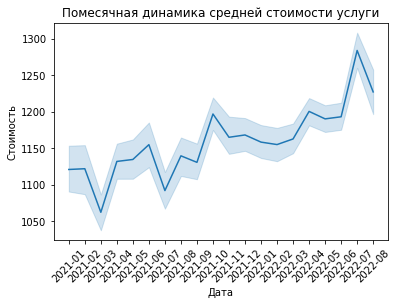

In [186]:
sns.lineplot(data=data, x='month', y='service_amount')
plt.xticks(rotation=45)
plt.title('Помесячная динамика средней стоимости услуги')
plt.xlabel('Дата')
plt.ylabel('Стоимость')
plt.show();



Пики цены - сентябрь 2021 года и июнь 2022
Данные за 22 год есть с января по август включительно

<b>Гипотеза не подтвердилась: средняя цена услуг выросла</b>
Есть постоянная сезонная динамика, связанная, вероятно, с типом сезонных услуг и их стоимостью

<h3>Гипотеза: произошло какое событие, спровоцировавшее частые заказы  в 2022 году более дорогих услуг</h3>

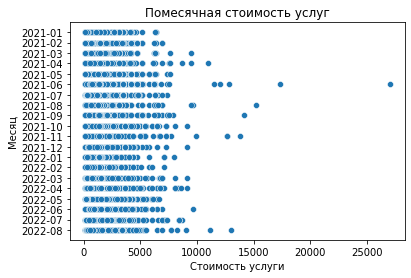

In [188]:
#проверим, есть ли выбросы в динамике по значениям и в какой ценовой зоне находится большая часть услуг
sns.scatterplot(x='service_amount', y='month', data=data)
plt.title('Помесячная стоимость услуг')
plt.xlabel('Стоимость услуги')
plt.ylabel('Месяц')
plt.show();

Большая часть услуг сгруппирована в диапазоне до 5000 рублей, выглядит похоже на реальность, есть выбросы, но  заметного изменения общей картины по сравнению с 2021 годом нет.
<b>Гипотеза не подтвердилась: заметного изменения нет</b>

<h3>Гипотеза: общее лечение в клинике стало обходиться дороже за счет включения большего количества услуг в план лечения</h3>

In [192]:
#сделаем сравнительные таблицы по 8 месяцев от начала каждого года 
year_2021 = data[data['year'] == '2021']
year_2021 = data[data['month'] < '2021-09'] 

year_2022 = data[data['year'] == '2022']

In [203]:
#узнаем, сколько страховая платила за одинаковые периоды обслуживания за одного застрахованного в медцентре
#возьмем медианные значения, поскольку они более устойчивы к выбросам

median_sum_2021=year_2021.groupby(['insured'])['service_amount'].sum().median()
median_sum_2022=year_2022.groupby(['insured'])['service_amount'].sum().median()
diff=round(((median_sum_2022-median_sum_2021)/median_sum_2021*100),2)


print(f'Медианная сумма за аналогичные периоды выросла с {median_sum_2021} на {diff}% и составила {median_sum_2022}')

Медианная сумма за аналогичные периоды выросла с 9188.0 на 5.9% и составила 9730.0


Проверим, выросла только медианная стоимость или объем услуг тоже<br>
Если сумма, потраченная на застрахованного за период, выросла, а количество услуг - нет, значит, выросла именно стоимость услуг

In [194]:
#сколько было зарегистрированных случаев обращений на пациента
#также возьмем медианные значение как более устойчивые к выбросам
med_visits_2021=year_2021.groupby('insured')['service_amount'].count().median()
med_visits_2022=year_2022.groupby('insured')['service_amount'].count().median()

print(f'Медианное количество обращений в медцентр в 2021 году {med_visits_2021}, а в 2022 - {med_visits_2022}')

Медианное количество обращений в медцентр в 2021 году 8.0, а в 2022 - 8.0


<b>Гипотеза не подтвердилась: за 8 месяцев - 8 обращений от пациента, вне зависимости от года</b>

<h3>Гипотеза: стоимость услуг была повышена в связи большим приростом клиентской базы</h3>

In [54]:
#посчитаем базу пациентов для уверенности
ins_count_2021=len(year_2021['insured'].unique())
ins_count_2022= len(year_2022['insured'].unique())
grow_persons = round(((ins_count_2022-ins_count_2021)/ins_count_2021*100),2)
print(f'в 2021 году в клинику обратилось {ins_count_2021} пациентов, а в 2022 {ins_count_2022}, что составляет {grow_persons}% роста базы за год ')

в 2021 году в клинику обратилось 1733 пациентов, а в 2022 2757, что составляет 59.09% роста базы за год 


<b>Гипотеза подтвердилась: база обратившихся застрахованных выросла значительно</b>

Вероятно, выросла популярность клиники. Как правило, рост популярности логичным образом влечет за собой рост цен.

<h3>Гипотеза: клиника изменила цены на какие-то конкретные типовые, часто заказываемые услуги</h3>

Средняя и медианная стоимость услуг выросли. Проверим, выросла ли стоимость или частотность каких-то конкрентных услуг, что дало общий рост? Возможно, произошла эпидемия нового вируса, и в прайслист добавили новую дорогую прививку.
На графике 2.2 видно, что большая часть услуг сгруппирована в диапазоне до 5000 рублей. Выделим типичные ценовые значения за разные годы.

<h4>Найдем часто появляющиеся в датасете услуги с их ценами</h4>

In [198]:
year_2021['service_amount'].describe()

count    26736.000000
mean      1120.494913
std        818.483224
min        147.000000
25%        525.000000
50%       1092.000000
75%       1470.000000
max      26999.000000
Name: service_amount, dtype: float64

In [199]:
year_2022['service_amount'].describe()

count    40977.000000
mean      1195.467262
std        779.103772
min        150.000000
25%        600.000000
50%       1200.000000
75%       1540.000000
max      13000.000000
Name: service_amount, dtype: float64

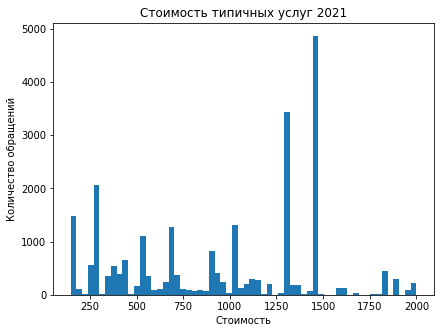

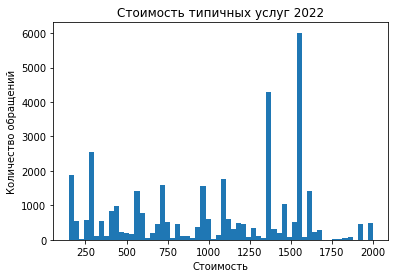

In [202]:
#Нарисуем графики, взяв типичные ценовые значения в примерных границах от минимального значения до чуть выше 75 перцентиля
plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)
plt.hist(year_2021['service_amount'], bins=60, range=(147, 2000))
plt.title('Стоимость типичных услуг 2021')
plt.xlabel('Cтоимость')
plt.ylabel('Количество обращений')
plt.show()


plt.hist(year_2022['service_amount'], bins=60, range=(147, 2000))

plt.title('Стоимость типичных услуг 2022')
plt.xlabel('Cтоимость')
plt.ylabel('Количество обращений')
plt.show()


Любопытно, что в 2021 году заметно большое количество обращений за услугой стоимостью чуть ниже 1500, а в 2022 - пик еще выше прошлогоднего, но с ценой чуть выше 1500. Что бы это могло быть?

In [24]:
#вероятные кандидаты на роль пиков в 2021 году между 1300 и 1500 рублей
candidates_one=year_2021.query("1300<service_amount <1500")
candidates_one.groupby('service_name')['service_amount'].count().sort_values(ascending=False).head(5)



service_name
Прием первичный                                          4477
Прием повторный                                          3295
Рентгенография шейного отдела позвоночника (2 снимка)      99
Классический лечебный массаж спины                         99
Расширеная кольпоскопия                                    89
Name: service_amount, dtype: int64

In [204]:
#вероятные кандидаты на роль пика в 2022 году между 1500 и 1600 рублей
candidates_two=year_2022.query("1500<service_amount <1600")
candidates_two.groupby('service_name')['service_amount'].count().sort_values(ascending=False).head(5)


service_name
Прием трапевта, первичный          809
Прием отоларинголога, первичный    615
Прием невролога, первичный         561
Прием офтальмолога,  первичный     423
Прием гинеколога, первичный        410
Name: service_amount, dtype: int64

In [26]:
#вероятные кандидаты на роль пика в 2022 году между 1300 и 1400 рублями
candidates_three=year_2022.query("1300<service_amount <1400")
candidates_three.groupby('service_name')['service_amount'].count().sort_values(ascending=False).head(5)


service_name
Прием гинеколога, повторный               772
Прием терапевта , повторный               468
Прием гастроэнтеролога, повторный         334
Прием невролога, повторный                332
Прием травматолога-ортопеда, повторный    310
Name: service_amount, dtype: int64

Очевидно, что с 2021 поменялась структура разметки страховых случаев: кажется "Прием" разделился на приемы различных врачей, как повторный, так и первичный


<h4>Сравним цены на типичные услуги год к году</h4>

In [27]:
#попробуем составить прайслист 2022 года
pricelist2022= year_2022[['service_name','service_amount','record_id']]. copy ()


In [28]:
print(len(pricelist2022))

40977


In [96]:
#посчитаем количество обращений по каждой услуги с ее ценой
grouped2022 = pricelist2022.groupby(['service_name', 'service_amount'])['record_id'].count().sort_values(ascending=False)
print(grouped2022.head())

service_name                                   service_amount
Взятие крови из периферической вены            170               1642
Общий анализ крови (лейкоцитарная форм,, СОЭ)  730               1225
Магнитотерапия (1 сеанс)                       1090              1142
Прием трапевта, первичный                      1540               809
Прием гинеколога, повторный                    1380               772
Name: record_id, dtype: int64


In [30]:
pricelist2021=year_2021[['service_name','service_amount','record_id']]. copy ()
print(len(pricelist2021))

26736


In [31]:
grouped2021 = pricelist2021.groupby(['service_name', 'service_amount'])['record_id'].count().sort_values(ascending=False)
print(grouped2021.head())

service_name                                   service_amount
Прием первичный                                1470              4477
Прием повторный                                1313              3295
Взятие крови из периферической вены            158               1291
Общий анализ крови (лейкоцитарная форм,, СОЭ)  693                995
Магнитотерапия (1 сеанс)                       1040               806
Name: record_id, dtype: int64


Большие пики 2021 года - это первичный (1470) и повторный приемы (1313)


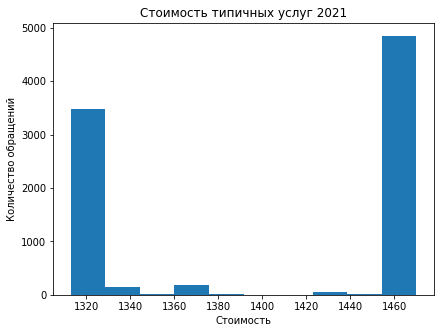

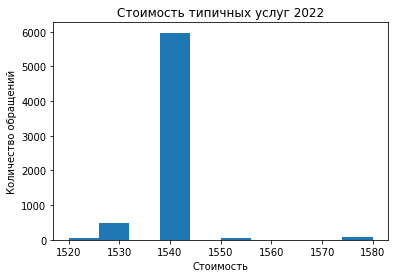

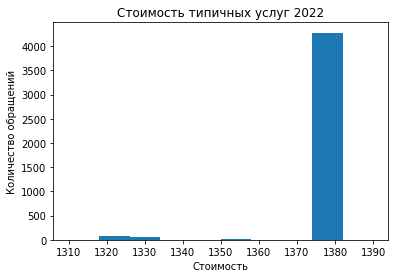

In [205]:
plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)
plt.hist(candidates_one['service_amount'], bins=10)
plt.title('Стоимость типичных услуг 2021')
plt.xlabel('Cтоимость')
plt.ylabel('Количество обращений')
plt.show()


plt.hist(candidates_two['service_amount'], bins=10)
plt.title('Стоимость типичных услуг 2022')
plt.xlabel('Cтоимость')
plt.ylabel('Количество обращений')
plt.show()

plt.hist(candidates_three['service_amount'], bins=10)
plt.title('Стоимость типичных услуг 2022')
plt.xlabel('Cтоимость')
plt.ylabel('Количество обращений')
plt.show()

In [33]:
candidates_two.query('service_amount ==1540').groupby('service_name')['record_id'].count().sort_values(ascending=False)

service_name
Прием трапевта, первичный                                                                                  809
Прием отоларинголога, первичный                                                                            615
Прием невролога, первичный                                                                                 561
Прием офтальмолога,  первичный                                                                             423
Прием гинеколога, первичный                                                                                410
Прием хирурга, первичный                                                                                   379
Прием травматолога-ортопеда, первичный                                                                     371
Прием эндокринолога, первичный                                                                             365
Прием дерматолога, первичный                                                                       

In [206]:
#кандидаты пик 2022
candidates_three.query('service_amount ==1380').groupby('service_name')['record_id'].count().sort_values(ascending=False)

service_name
Прием гинеколога, повторный                                           772
Прием терапевта , повторный                                           468
Прием гастроэнтеролога, повторный                                     334
Прием невролога, повторный                                            332
Прием травматолога-ортопеда, повторный                                310
Прием уролога, повторный                                              277
Прием отоларинголога, повторный                                       267
Прием эндокринолога, повторный                                        261
Прием физиотерапевта, повторный                                       223
Прием педиатра, повторный                                             190
Прием хирурга, повторный                                              184
Прием кардиолога, повторный                                           153
Прием аллерголога, повторный                                           86
Прием дерматолога, повтор

Пики 2021 года - это преимущественно первичный (1470) и повторный приемы (1313)
Пики 2022 года - это преимущественно первичный прием врача стоимостью 1540, и повторный прием врача - 1380 рублей

Вывод: клиника разбила приемы общие по категориям врачей и подняла цену на них,гипотеза подтвердилась


<h4>Соберем прайслисты по двум годам</h4>

In [71]:
# создадим отдельные таблицы с ценами на услуги за 2021 и 2022 года
median_price_2021 = year_2021.groupby('service_name', as_index=False)['service_amount'].median()
display(median_price_2021.head(20))
print(len(median_price_2021))

median_price_2022 = year_2022.groupby('service_name', as_index=False)['service_amount'].median()
display(median_price_2022.head(20))
print(len(median_price_2022))

,service_name,service_amount
0,"(Б1 (11))Аллергопанель IgE шерсть кошки, шерст...",1449.0
1,25-OH витамин D (25-гидроксихолекальциферол),3255.0
2,Bordetella pertussis (Слюна),462.0
3,CMV (цитомегаловирус) (Кровь),378.0
4,CMV (цитомегаловирус) (Слюна),378.0
5,CMV (цитомегаловирус) (Соскоб),378.0
6,Candida albicans (Соскоб),378.0
7,Chlamydia pneumoniae IgA,599.0
8,Chlamydia pneumoniae IgG,599.0
9,Chlamydia pneumoniae IgM,599.0


596


,service_name,service_amount
0,"(1 E)Аллергопанель IgE (Молоко коровье, Молоко...",1520.0
1,"(2 E)Аллергопанель IgE (Пшеничная мука, Ржаная...",1520.0
2,"(3 E)Аллергопанель IgE (Фасоль (бобы), Горох, ...",1520.0
3,"(4 E)Аллергопанель IgE (Говядина, Телятина, Св...",1520.0
4,"(Б1 (11))Аллергопанель IgE шерсть кошки, шерст...",1520.0
5,17-OH - гидроксипрогестерон,610.0
6,25-OH витамин D (25-гидроксихолекальциферол),3420.0
7,Ascaris IgG,830.0
8,Bordetella (pertusis) IgA,970.0
9,Bordetella (pertusis) IgG,690.0


679


Тут так же очевидно, что в 2022 расширился ассортимент услуг медцентра: в 2021 их 596, а в 2022 - 679

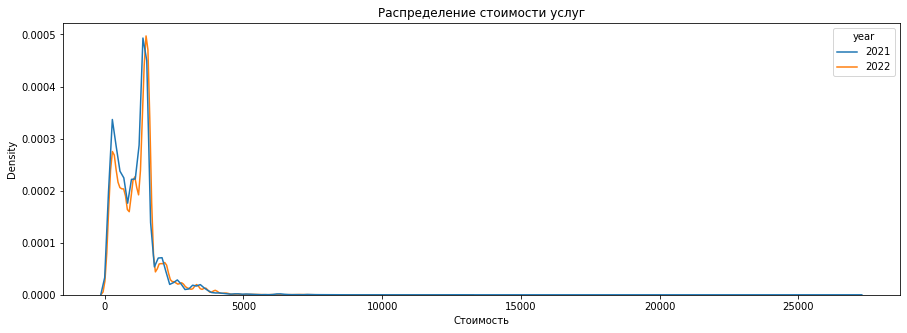

In [73]:
# построим график распределения цены услуг. (выпилить? не показательно)
plt.figure(figsize=(15, 5))
sns.kdeplot(data=data, x='service_amount', hue='year')
plt.title('Распределение стоимости услуг')
plt.xlabel('Стоимость')

plt.show()

<h4>Категоризуем по изменениям</h4>

Соединим таблицы, чтобы подорожание стало наглядным<br>
Помним, что сюда не входят первичные и вторичные приемы, составляющие большую долю типичных услуг<br>
Будем считать это категорией "другое"<br>


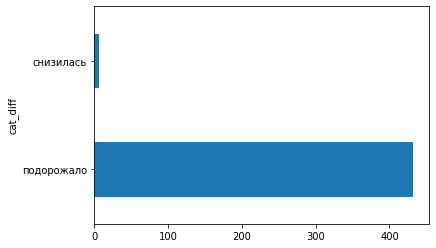

In [152]:
#смерджим таблички с ценами для наглядности (по тем услугам, которые встречаются за оба периода;
diff_data = median_price_2021.merge(median_price_2022, how='inner', on='service_name')
diff_data.columns = ['service_name', 'price_2021', 'price_2022']
diff_data['diff'] = diff_data['price_2022']-diff_data['price_2021']
table_diff=diff_data.sort_values(by='diff', ascending=False)

#разметим их по изменениям
def cat_diff(diff):
    if diff>0:
        return 'подорожало'
    elif diff==0:
        return 'не изменилось'
    else:
        return 'снизилась'

table_diff['cat_diff']=table_diff['diff'].apply(cat_diff)

#нарисуем график по этим данным
table_diff.groupby('cat_diff')['diff'].count().plot(kind='barh');


In [162]:
table_diff.head(20)

,service_name,price_2021,price_2022,diff,cat_diff
202,МРТ коленного сустава,6195.0,9750.0,3555.0,подорожало
108,Гистологическое исследование операционного мат...,2426.0,3825.0,1399.0,подорожало
416,Хирургическое удаление доброкачественной опухо...,7665.0,8400.0,735.0,подорожало
375,Удаление вросшего ногтя,6300.0,6950.0,650.0,подорожало
382,Ультразвуковое исследование большие сроки бере...,3045.0,3500.0,455.0,подорожало
299,Пункция щитовидной или паращитовидной железы (...,4074.0,4500.0,426.0,подорожало
96,Вскрытие панариция,7665.0,8050.0,385.0,подорожало
123,Дуплексное сканирование вен верхних конечностей,2625.0,3000.0,375.0,подорожало
204,МРТ плечевого сустава,7350.0,7720.0,370.0,подорожало
374,Удаление атеромы,6615.0,6950.0,335.0,подорожало


In [218]:

# посчитаем разницу в процентах
diff_data['difference, %'] = ((diff_data['price_2022'] - diff_data['price_2021']) /diff_data['price_2021']) * 100

#средний рост цен на услуги
grow=round(diff_data['difference, %'].mean(), 2)
    
print(diff_data)
print(f'средний рост цены услуги: {grow} %')

                                          service_name  price_2021  \
0    (Б1 (11))Аллергопанель IgE шерсть кошки, шерст...      1449.0   
1         25-OH витамин D (25-гидроксихолекальциферол)      3255.0   
2                        CMV (цитомегаловирус) (Кровь)       378.0   
3                        CMV (цитомегаловирус) (Слюна)       378.0   
4                       CMV (цитомегаловирус) (Соскоб)       378.0   
..                                                 ...         ...   
434                                    Эпителий собаки      1155.0   
435                                          Эстрадиол       630.0   
436           Эхокардиография с допплеровским анализом      3465.0   
437                                      альфа-амилаза       287.0   
438         бета-ХГЧ (бета-хорионический гонадотропин)       756.0   

     price_2022   diff  difference, %  
0        1520.0   71.0       4.899931  
1        3420.0  165.0       5.069124  
2         400.0   22.0       5.820106  

Вывод: пересекающиеся услуги подорожали практически все, что косвенным образом, вероятно, связано с ростом популярности клиники. В наибольшей степени подорожали МРТ и хирургия. что вероятно, связано с подорожанием расходников и логистики в 2022 году.
Средний рост пересекающихся услуг - 5.09 %



<h3>Гипотеза: цены услуг связаны с полом застрахованного</h3>

In [212]:
#посчитаем корреляцию между полом и ценой услуги
print('2021')
print(year_2021['sex_id'].corr(year_2021['service_amount']))



2021
-0.01585989508796264


In [213]:
print('2022')
print(year_2022['sex_id'].corr(year_2022['service_amount']))


2022
0.0057697597770907895


Гипотеза не подтвердилась - корреляция минимальна

<h3>Гипотеза: цены услуг связаны с возрастом застрахованного</h3>

In [214]:
#посчитаем корреляцию между полом и ценой услуги
print('2021')
print(year_2021['age_for_service_date'].corr(year_2021['service_amount']))

2021
0.02099631172713259


In [216]:
print('2022')
print(year_2022['age_for_service_date'].corr(year_2022['service_amount']))

2022
0.0010939114503073497


Гипотеза не подтвердилась - корреляция минимальна

Вывод: 
- с 2021 поменялась структура разметки страховых данных в медцентре: первичный прием (общий) в 2022 начали делить по врачам и повысили его стоимость
- В 2021 году первичный прием врача стоил 1470, а повторный 1313, в 2022 первичный прием вырос до 1540, и повторный до 1380 рублей
-  В среднем цена других повторяющихся услуг увеличилась на 5.09%.
- популярность клиники выросла в 2022 году, обычно это провоцирует повышение стоимости, так что тоже могло стать причиной
- в наибольшей степени подорожали МРТ и хирургия. что вероятно, связано с подорожанием расходников и логистики в 2022 году.